In [108]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2
from minepy import MINE
from scipy.stats import pearsonr
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [53]:
table1 = pd.read_csv('./data/features.csv')
table2 = pd.read_csv('./data/stores.csv')
table3 = pd.read_csv('./data/train.csv')

table = pd.merge(table2, table1, on=['Store'], how='outer')
df = pd.merge(table, table3, on=['Store','Date','IsHoliday'], how='outer')

#print(table.shape)
#print(df.shape)
#print(len(df))

import time
import datetime

isholiday = []
dates     = []
types     = []

print(df.loc[0][3])
date_time = datetime.datetime.strptime(df.loc[0][3],'%Y-%m-%d')
time_time = time.mktime(date_time.timetuple())

for i in range(len(df)):
    if df.loc[i][13] == True:
        isholiday.append(1)
    else:
        isholiday.append(0)
    date_time2 = datetime.datetime.strptime(df.loc[i][3],'%Y-%m-%d')
    time_time2 = time.mktime(date_time2.timetuple())
    dates.append(time_time2-time_time)
    assert(df.loc[i][1] <= 'C')
    if df.loc[i][1] == 'A':
        types.append(0)
    elif df.loc[i][1] == 'B':
        types.append(1)
    else:
        types.append(2)
        
    
df['IsHoliday'] = isholiday
df['Date'] = dates
df['Type'] = types

2010-02-05


In [54]:
print df.shape
print(df.loc[1]['Weekly_Sales'])
a = df.loc[len(df['Weekly_Sales'])-1]['Weekly_Sales']
assert(a != a)

(423325, 16)
50605.27


In [55]:
df = df[df['Weekly_Sales'] == df['Weekly_Sales']]

df.to_csv('./data/ftrs.csv', columns=['Store','Type','Size','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday','Dept'], index=False, header=True)
#df.to_csv('./data/ftrs2.csv', columns=['Store','Size','Date','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday','Dept'], index=False, header=True)
df.to_csv('./data/lbls.csv', columns=['Weekly_Sales'], index=False, header=True)

### Preparation

In [114]:
X = pd.read_csv('./data/ftrs.csv').as_matrix(['Store','Type','Size','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday','Dept'])
#X = pd.read_csv('./data/ftrs2.csv', header=0).as_matrix(['Store','Size','Date','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday','Dept'])
y = pd.read_csv('./data/lbls.csv', header=0).as_matrix(['Weekly_Sales'])
print(X.shape) 
#print(type(X))
print(y.shape) 
#print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

#X_train = X_train.astype('float32')
y_train = y_train.astype('int')
#X_test = X_test.astype('float32')
y_test = y_test.astype('int')


print(X_train[0:5])
# Create our imputer to replace missing values with the mean e.g.
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) # 'mean', 'median', 'most_frequent'
imp = imp.fit(X_train)
# Impute our data, then train
X_train = imp.transform(X_train)

imp = imp.fit(X_test)
X_test = imp.transform(X_test)
print(X_train[0:5])

(421570, 15)
(421570, 1)
[[  4.50000000e+01   1.00000000e+00   1.18221000e+05   5.20128000e+07
    7.06600000e+01   3.64500000e+00              nan              nan
               nan              nan              nan   1.87256664e+02
    8.62500000e+00   0.00000000e+00   3.10000000e+01]
 [  1.20000000e+01   1.00000000e+00   1.12238000e+05   3.14496000e+07
    4.51400000e+01   3.34800000e+00              nan              nan
               nan              nan              nan   1.27719581e+02
    1.40210000e+01   0.00000000e+00   2.00000000e+01]
 [  2.70000000e+01   0.00000000e+00   2.04184000e+05   1.93536000e+07
    6.45000000e+01   2.84600000e+00              nan              nan
               nan              nan              nan   1.36633807e+02
    7.98200000e+00   0.00000000e+00   2.80000000e+01]
 [  2.20000000e+01   1.00000000e+00   1.19557000e+05   3.74976000e+07
    4.88800000e+01   3.82300000e+00              nan              nan
               nan              nan        

In [113]:
""" random foreset """
from sklearn.ensemble import RandomForestClassifier
repeat = range(5)
accuracy_in_sample = []
accuracy_out_sample = []

for it in repeat:
    rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                max_depth=5, max_features='auto', max_leaf_nodes=None,
                                min_samples_leaf=10, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0,
                                warm_start=False)
    rf.fit(X_train[::100], y_train.ravel()[::100])             # fit the data to algorithm
    accuracy_in_sample.append(rf.score(X_train, y_train))
    accuracy_out_sample.append(rf.score(X_test, y_test))
    
accuracy_in_sample  = np.array(accuracy_in_sample)
accuracy_out_sample = np.array(accuracy_out_sample)

print np.min(accuracy_in_sample)
print np.argmin(accuracy_in_sample)
print np.min(accuracy_out_sample)
print np.argmin(accuracy_out_sample)

import matplotlib.pyplot as plt
plot1 = plt.plot(repeat, accuracy_in_sample, color='green', label='Accuracy of in-sample')
plot2 = plt.plot(repeat, accuracy_out_sample, color='red', label='Accuracy of out-sample')
plt.xlabel('n_estimators = 1000, number of features is ?')
plt.ylabel('Accuracy of training and testing')
plt.legend([plot1, plot2], ("training accuracy", "test accuracy"))# make legend
plt.show()

#y_train_pred = rf.predict(X_train_new)      # apply model to train data to get the error in sample
#y_test_pred = rf.predict(X_test_new)        # apply model to test data to get the error out of sample
#error_in.append(metrics.mean_absolute_error(y_train_pred, y_train))
#error_out.append(metrics.mean_absolute_error(y_test_pred, y_test))
#accuracy_in_sample.append(rf.score(X_train, y_train))
#accuracy_out_sample.append(rf.score(X_test, y_test))
#print(rf.score(X_train, y_train))
#print(rf.score(X_test, y_test))

KeyboardInterrupt: 

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=300, max_depth=3, 
                                min_samples_split=3, min_samples_leaf=6)
gbr.fit(X_train, y_train.ravel())
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.828753839442
0.809340874667


In [120]:
gbr.feature_importances_

array([  1.09158520e-01,   1.44212450e-02,   1.58965578e-01,
         4.70218683e-02,   8.30671145e-03,   1.81845464e-03,
         5.24735708e-04,   2.07416994e-03,   1.51719775e-02,
         9.53499539e-04,   2.48544736e-03,   2.68086484e-02,
         1.72292229e-02,   1.60056658e-03,   5.93459354e-01])

In [104]:
new_train = X_train[:, gbr.feature_importances_ > 1e-01]
new_test = X_test[:, gbr.feature_importances_ > 1e-01]
print new_train.shape
print new_test.shape

(337256, 3)
(84314, 3)


In [107]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=300, max_depth=3, 
                                min_samples_split=3, min_samples_leaf=3)
gbr.fit(new_train, y_train.ravel())
print(gbr.score(new_train, y_train))
print(gbr.score(new_test, y_test))

0.822489813455
0.806150348068


ValueError: Number of features of the model must  match the input. Model n_features is 15 and  input n_features is 3 

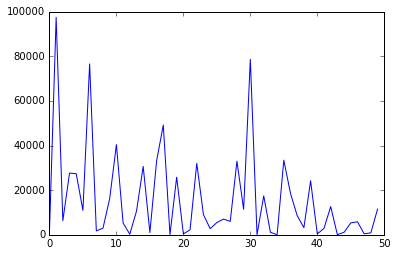

In [118]:
import matplotlib.pyplot as plt
plt.plot(y_test[::50])
plt.plot(gbr.predict(new_test[::50]))
plt.savefig('./data/output.eps',format="eps")

## MI

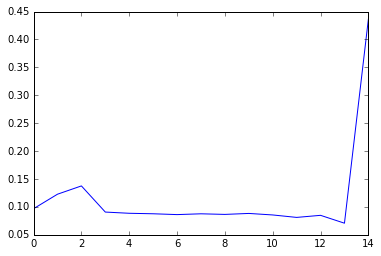

In [61]:
K = len(X_train[0]) # feature number
mi = []
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    #return (m.mic(), 0.5)
    return m.mic()

for it in range(K):
    tmp = mic(X_train[::100,it], y_train[::100,0])
    mi.append(tmp)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mi)
plt.show()
#train = SelectKBest(lambda X, Y: np.array(map(lambda x:mic(x, Y), X.T)).T, k=K).fit_transform(train, label)